# **Limpieza de datos para predicción del APGAR a los 5 minutos**

En este notebook se documenta el proceso integral de limpieza y preparación del conjunto de datos “Nacimientos_ocurridos_en_el_Hospital_General_de_Medellín_20250517.csv”, disponible en el portal de datos abiertos de Colombia (https://www.datos.gov.co/Salud-y-Protección-Social/Nacimientos-ocurridos-en-el-Hospital-General-de-Me/kjs7-2ryw/about_data).

El objetivo de esta limpieza es dejar el conjunto de datos en condiciones óptimas para construir un modelo de regresión que permita predecir el puntaje APGAR a los 5 minutos de nacido.

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

1. INTEGRACIÓN

In [4]:
# Cargar el dataset
df = pd.read_csv("Nacimientos_ocurridos_en_el_Hospital_General_de_Medell_n_20250517.csv", encoding='latin1')

# Visualización general del DataFrame
df.head()


,ANO,PERIODO DE REPORTE,SEXO,PESO (Gramos),TALLA (CentImetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,...,MUNICIPIO RESIDENCIA,AREA RESIDENCIA,LOCALIDAD,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,REGIMEN SEGURIDAD,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,PROFESION CERTIFICADOR
0,2022,1,FEMENINO,2341.0,44.0,01/01/2022 12:00:00 AM,MEDICO,37.0,7,ESPONTANEO,...,BELLO,CABECERA MUNICIPAL,COMUNA 01,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,22.0,BASICA SECUNDARIA,MEDICO
1,2022,1,MASCULINO,3750.0,51.0,01/01/2022 12:00:00 AM,MEDICO,40.0,7,ESPONTANEO,...,ANORI,RURAL DISPERSO,SIN INFORMACION,2,4,SUBSIDIADO,SAVIA SALUD E.P.S.,20.0,MEDIA ACADEMICA O CLASICA,MEDICO
2,2022,1,MASCULINO,3527.0,51.0,01/01/2022 12:00:00 AM,MEDICO,38.0,7,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,SAN JAVIER,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,50.0,MEDIA ACADEMICA O CLASICA,MEDICO
3,2022,1,FEMENINO,2745.0,47.0,01/01/2022 12:00:00 AM,MEDICO,38.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,MANRIQUE,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,32.0,MEDIA ACADEMICA O CLASICA,MEDICO
4,2022,1,FEMENINO,2315.0,43.0,01/01/2022 12:00:00 AM,MEDICO,35.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,VILLA HERMOSA,3,5,SUBSIDIADO,SAVIA SALUD E.P.S.,27.0,BASICA SECUNDARIA,MEDICO


In [5]:
# Revisión de duplicados exactos
print("Duplicados:", df.duplicated().sum())

Duplicados: 1


In [6]:
# Visualización de filas duplicadas
df[df.duplicated(keep=False)]


,ANO,PERIODO DE REPORTE,SEXO,PESO (Gramos),TALLA (CentImetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,...,MUNICIPIO RESIDENCIA,AREA RESIDENCIA,LOCALIDAD,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,REGIMEN SEGURIDAD,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,PROFESION CERTIFICADOR
8340,2023,3,FEMENINO,1980.0,46.0,08/12/2023 12:00:00 AM,MÃDICO,36.0,3,ESPONTÃNEO,...,ITUANGO,RURAL DISPERSO,SIN INFORMACION,3,4,SUBSIDIADO,SAVIA SALUD E.P.S.,26.0,BÃSICA SECUNDARIA,MÃDICO
8341,2023,3,FEMENINO,1980.0,46.0,08/12/2023 12:00:00 AM,MÃDICO,36.0,3,ESPONTÃNEO,...,ITUANGO,RURAL DISPERSO,SIN INFORMACION,3,4,SUBSIDIADO,SAVIA SALUD E.P.S.,26.0,BÃSICA SECUNDARIA,MÃDICO


In [7]:
# Eliminación de duplicados
df = df.drop_duplicates()

In [8]:
# Revisión de filas completamente vacías
filas_vacias = (df.isnull().sum(axis=1) == df.shape[1]).sum()
print(f"\nFilas completamente vacías: {filas_vacias}")


Filas completamente vacías: 0


2. SELECCIÓN DE VARIABLES

In [9]:
# Selección de variables relevantes según literatura y objetivo de predicción
relevant_columns = [
    'SEXO', 'PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO',
    'APGAR1', 'APGAR2', 'EDAD MADRE', 
    'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS'
]

In [10]:
# Subconjunto del dataframe original con las variables elegidas
df_relevantes = df[relevant_columns].copy()
print(f"\nVariables seleccionadas: {len(relevant_columns)}")


Variables seleccionadas: 12


In [11]:
df_relevantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 10037
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEXO                         10037 non-null  object 
 1   PESO (Gramos)                10036 non-null  float64
 2   TALLA (CentImetros)          10036 non-null  float64
 3   TIEMPO DE GESTACION          10030 non-null  float64
 4   NUMERO CONSULTAS PRENATALES  10037 non-null  int64  
 5   TIPO PARTO                   10037 non-null  object 
 6   MULTIPLICIDAD EMBARAZO       10037 non-null  object 
 7   APGAR1                       10015 non-null  float64
 8   APGAR2                       10015 non-null  float64
 9   EDAD MADRE                   10037 non-null  int64  
 10  NUMERO HIJOS NACIDOS VIVOS   10037 non-null  int64  
 11  NUMERO EMBARAZOS             10037 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1019.4+ KB


In [12]:
# Conversión de columnas categóricas de tipo object a category
df_relevantes['SEXO'] = df_relevantes['SEXO'].astype('category')
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].astype('category')
df_relevantes['MULTIPLICIDAD EMBARAZO'] = df_relevantes['MULTIPLICIDAD EMBARAZO'].astype('category')



In [13]:
# Verificación del tipo de datos
print("\nTipos de datos tras conversión:")
df_relevantes.info()


Tipos de datos tras conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 10037
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SEXO                         10037 non-null  category
 1   PESO (Gramos)                10036 non-null  float64 
 2   TALLA (CentImetros)          10036 non-null  float64 
 3   TIEMPO DE GESTACION          10030 non-null  float64 
 4   NUMERO CONSULTAS PRENATALES  10037 non-null  int64   
 5   TIPO PARTO                   10037 non-null  category
 6   MULTIPLICIDAD EMBARAZO       10037 non-null  category
 7   APGAR1                       10015 non-null  float64 
 8   APGAR2                       10015 non-null  float64 
 9   EDAD MADRE                   10037 non-null  int64   
 10  NUMERO HIJOS NACIDOS VIVOS   10037 non-null  int64   
 11  NUMERO EMBARAZOS             10037 non-null  int64   
dtypes: category(3), float64(5), int6

3. DESCRIPCIÓN ESTADÍSTICA

3.1 Análisis de variables numéricas

In [14]:
# Estadísticas descriptivas para variables numéricas
df_relevantes.describe()

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
count,10036.000000,10036.000000,10030.000000,10037.000000,10015.000000,10015.000000,10037.000000,10037.000000,10037.000000
mean,2928.329314,47.495715,37.877567,6.574375,9.185622,9.533699,25.179934,1.899173,2.129720
std,570.593265,3.015139,2.226027,3.043653,1.156253,0.891137,6.403879,1.189832,1.385352
min,430.000000,27.000000,24.000000,0.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,2620.000000,46.000000,37.000000,5.000000,9.000000,9.000000,20.000000,1.000000,1.000000
50%,2987.500000,48.000000,38.000000,7.000000,9.000000,10.000000,24.000000,2.000000,2.000000
75%,3304.000000,49.000000,39.000000,8.000000,10.000000,10.000000,29.000000,2.000000,3.000000
max,5200.000000,57.000000,42.000000,24.000000,10.000000,10.000000,47.000000,13.000000,14.000000


A continuación se presentan histogramas para visualizar la distribución de las variables numéricas más relevantes del conjunto de datos. De acuerdo a los histogramas es posible afirmar:

- PESO y TALLA muestran distribuciones aproximadamente normales, centradas en valores esperados para recién nacidos.

- TIEMPO DE GESTACIÓN se concentra entre 37 y 40 semanas, con leve sesgo a la izquierda.

- CONSULTAS PRENATALES, HIJOS NACIDOS VIVOS y EMBARAZOS presentan fuerte asimetría positiva, con mayoría de casos en valores bajos y algunos posibles atípicos.

- EDAD DE LA MADRE se concentra entre los 18 y 30 años.

- APGAR1 y APGAR2 están fuertemente sesgados hacia 9 y 10, lo que indica buena condición general de los recién nacidos.

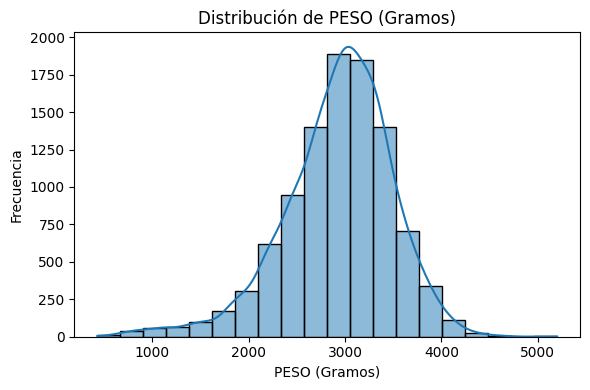

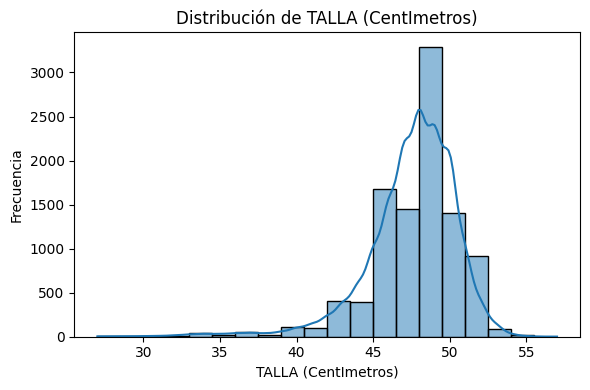

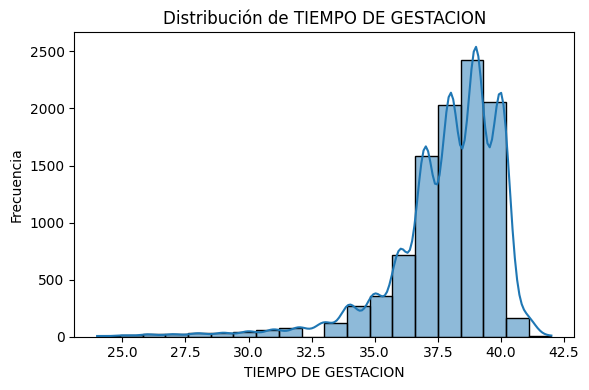

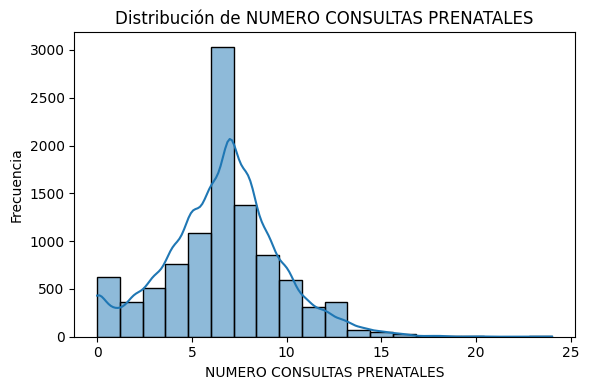

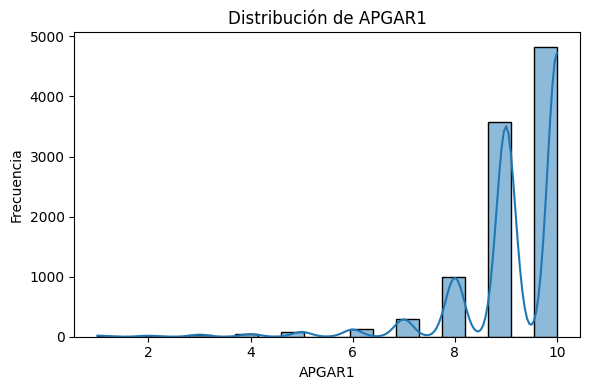

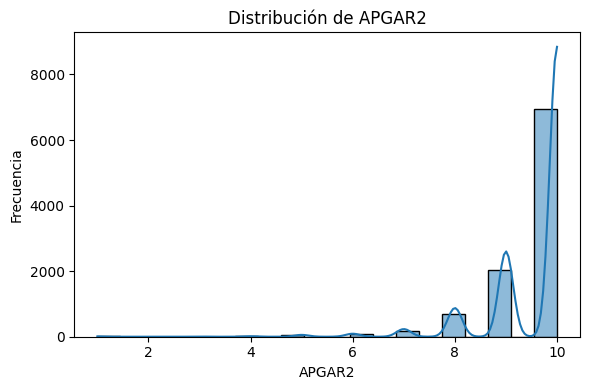

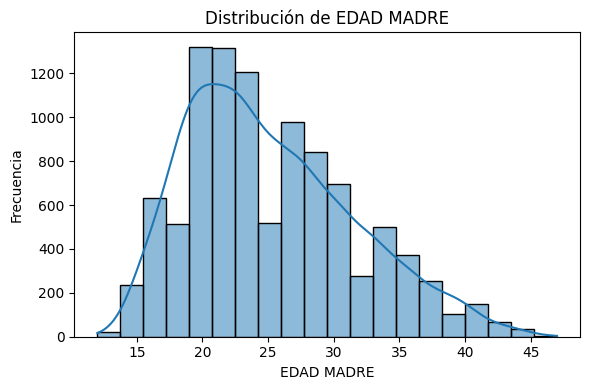

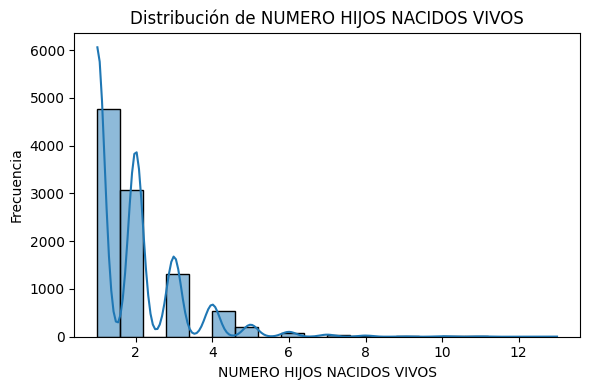

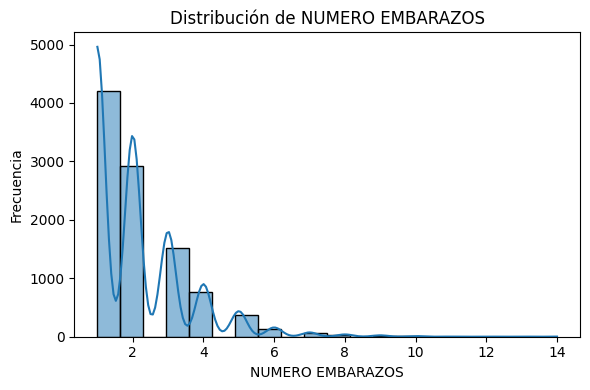

In [15]:
# Visualización: histogramas de variables numéricas
numeric_cols = df_relevantes.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_relevantes[col].dropna(), kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

3.2 Análisis de variables categóricas

In [16]:
# Frecuencias de variables categóricas
columnas_categoricas = ['SEXO', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO']

for col in columnas_categoricas:
    print(df_relevantes[col].value_counts(dropna=False))

SEXO
MASCULINO        5077
FEMENINO         4959
INDETERMINADO       1
Name: count, dtype: int64
TIPO PARTO
ESPONTANEO       4971
CESAREA          2290
ESPONTÃNEO      1533
CESÃREA          724
INSTRUMENTADO     519
Name: count, dtype: int64
MULTIPLICIDAD EMBARAZO
SIMPLE    9733
DOBLE      295
TRIPLE       9
Name: count, dtype: int64


Ya que se identificaron errores de codificación en la columna TIPO PARTO, como 'ESPONTÁNEO' escrito como 'ESPONTÃNEO' y 'CESÁREA' como 'CESÃREA', se realizaron correcciones manuales para estandarizar estos valores

In [17]:
#Poner 'ESPONTÃNEO' en 'ESPONTANEO'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')

#Poner 'CESÃREA' en 'CESAREA'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')

C:\Users\alexa\AppData\Local\Temp\ipykernel_13620\1847319756.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')
C:\Users\alexa\AppData\Local\Temp\ipykernel_13620\1847319756.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')


Se graficaron las variables categóricas más relevantes para observar su distribución:

- SEXO: la distribución está equilibrada entre masculino y femenino, con un número mínimo (sólo 1) de casos clasificados como "INDETERMINADO".

- TIPO DE PARTO: predomina el parto espontáneo, seguido por cesárea. El parto instrumentado es poco frecuente.

- MULTIPLICIDAD DEL EMBARAZO: la mayoría de los casos corresponden a embarazos simples. Los embarazos dobles o triples son muy poco comunes, lo cual es esperable.



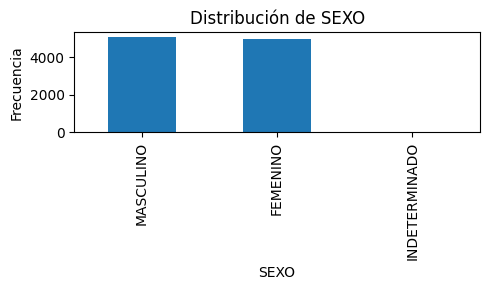

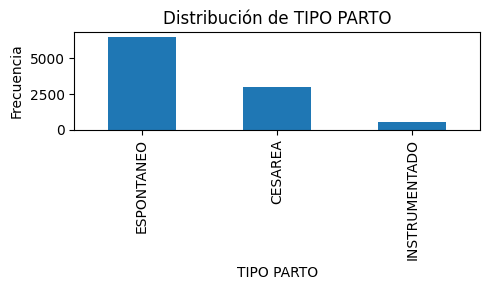

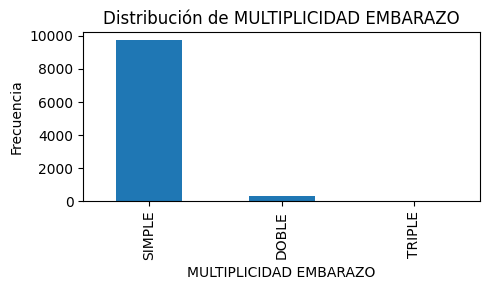

In [18]:
# Visualización: gráficos de barras para categóricas
for col in columnas_categoricas:
    plt.figure(figsize=(5, 3))
    df_relevantes[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

4. LIMPIEZA DE ATÍPICOS

Se utilizaron gráficos tipo boxplot para analizar la presencia de valores atípicos en variables numéricas clave. Sin embargo, tras un análisis contextual de los datos,se concluyó que:

- En número de consultas prenatales, aunque hay valores altos, es clínicamente válido que algunas mujeres tengan muchas o pocas consultas según su situación.

- En APGAR1 y APGAR2, los valores bajos aparecen como outliers debido a la fuerte concentración en los puntajes altos (9-10), pero son casos reales y relevantes.

- La edad de la madre por encima de 40 años, aunque poco frecuente, es biológicamente posible y no representa un error.

- En número de hijos nacidos vivos y número de embarazos, los valores altos reflejan casos extremos pero válidos, especialmente considerando que las distribuciones están sesgadas hacia los valores bajos.

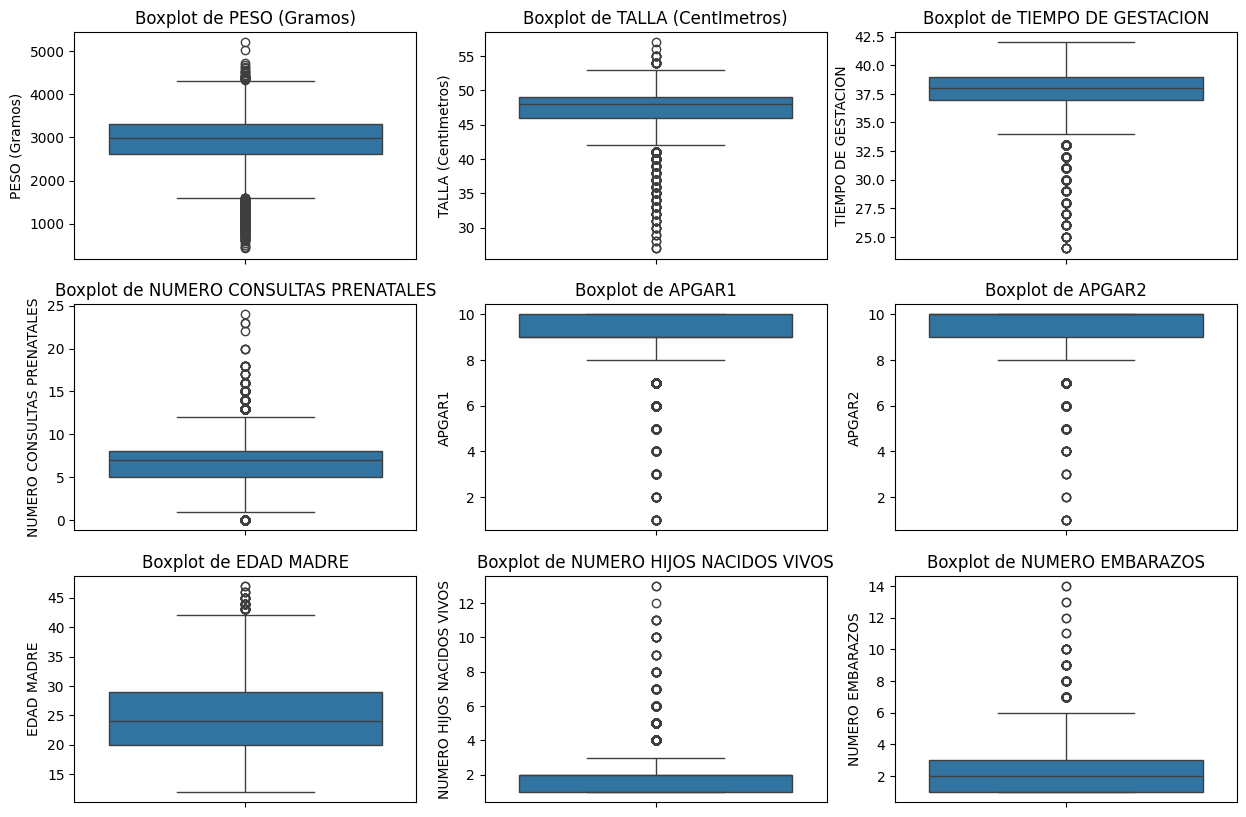

In [19]:
# Visualización múltiple de boxplots para variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_relevantes[col])
    plt.title(f'Boxplot de {col}')


In [20]:
# Revisión de máximos y mínimos para validación general
print("\nValores extremos en variables numéricas:")
print("Peso máximo:", df_relevantes['PESO (Gramos)'].max(), "gramos")
print("Edad madre máxima:", df_relevantes['EDAD MADRE'].max(), "años")
print("Número máximo de embarazos:", df_relevantes['NUMERO EMBARAZOS'].max())

print("Peso mínimo:", df_relevantes['PESO (Gramos)'].min(), "gramos")
print("Talla mínima:", df_relevantes['TALLA (CentImetros)'].min(), "cm")
print("Edad madre mínima:", df_relevantes['EDAD MADRE'].min(), "años")


Valores extremos en variables numéricas:
Peso máximo: 5200.0 gramos
Edad madre máxima: 47 años
Número máximo de embarazos: 14
Peso mínimo: 430.0 gramos
Talla mínima: 27.0 cm
Edad madre mínima: 12 años


**Análisis de consistencia multivariable para detectar valores inusuales**

Aunque individualmente no se eliminaron valores atípicos por su validez clínica o biológica, algunos casos podrían considerarse erróneos si presentan combinaciones inusuales entre variables. Por ejemplo:

Bebés con peso extremadamente bajo (menos de 1000 gramos) combinados con una talla o tiempo de gestación normal podrían indicar errores de registro.

Se realizó un análisis específico para identificar casos con peso < 1000g y, al cruzar con las variables de talla y tiempo de gestación, no se encontraron combinaciones anómalas. Por tanto, se concluye que no es necesario eliminar registros por inconsistencia multivariable.

In [21]:
# Examinar casos con pesos extremadamente bajos
bebes_bajo_peso = df_relevantes[df_relevantes['PESO (Gramos)'] < 1000]

# Ver si tienen bajo tiempo de gestación (prematurez extrema) y talla pequeña
print(bebes_bajo_peso[['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION']])

       PESO (Gramos)  TALLA (CentImetros)  TIEMPO DE GESTACION
316            626.0                 32.0                 26.0
374            728.0                 32.0                 28.0
744            700.0                 33.0                 24.0
834            722.0                 34.0                 25.0
1065           800.0                 32.0                 25.0
...              ...                  ...                  ...
9365           710.0                 30.0                 25.0
9367           920.0                 34.0                 25.0
9577           500.0                 29.0                 27.0
9866           912.0                 34.0                 27.0
10007          990.0                 34.0                 30.0

[68 rows x 3 columns]


In [23]:
# Promedios de peso por semanas de gestación
print(bebes_bajo_peso.groupby('TIEMPO DE GESTACION')['PESO (Gramos)'].agg(['count', 'mean', 'min', 'max']))

                     count        mean    min    max
TIEMPO DE GESTACION                                 
24.0                     6  695.000000  469.0  876.0
25.0                    11  745.090909  596.0  920.0
26.0                    18  755.055556  430.0  960.0
27.0                     7  865.000000  500.0  970.0
28.0                     8  838.875000  670.0  970.0
29.0                     9  872.666667  780.0  980.0
30.0                     4  877.000000  710.0  990.0
31.0                     4  796.500000  630.0  945.0
32.0                     1  814.000000  814.0  814.0


In [24]:
# Casos clínicamente inconsistentes: bebés con bajo peso pero gestación o talla normales
print("\nCasos que merecen revisión especial:")
casos_sospechosos = bebes_bajo_peso[
    (bebes_bajo_peso['TIEMPO DE GESTACION'] > 36) |  # Gestación normal pero peso muy bajo
    (bebes_bajo_peso['TALLA (CentImetros)'] > 45)    # Talla normal pero peso muy bajo
]
print(casos_sospechosos[['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION']])



Casos que merecen revisión especial:
Empty DataFrame
Columns: [PESO (Gramos), TALLA (CentImetros), TIEMPO DE GESTACION]
Index: []


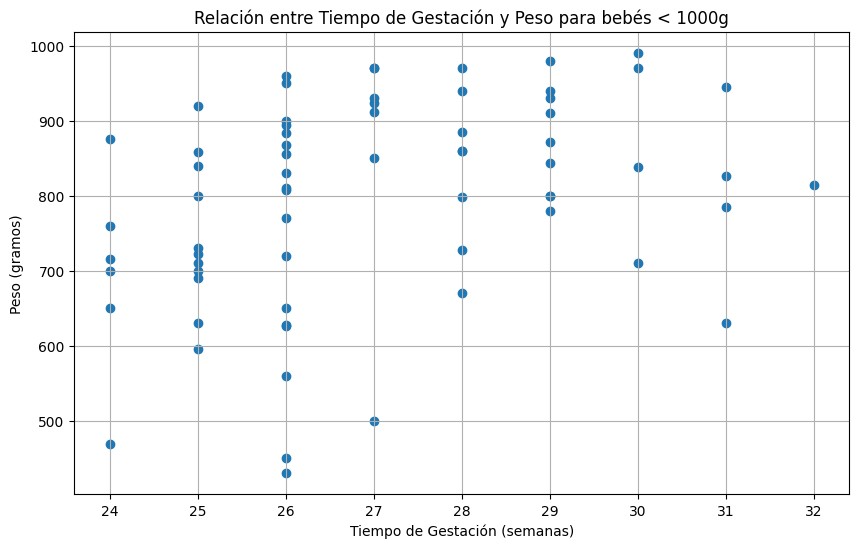

In [25]:
# Visualización: relación entre peso y semanas de gestación en bebés <1000g
plt.figure(figsize=(10, 6))
plt.scatter(bebes_bajo_peso['TIEMPO DE GESTACION'], bebes_bajo_peso['PESO (Gramos)'])
plt.title('Relación entre Tiempo de Gestación y Peso para bebés < 1000g')
plt.xlabel('Tiempo de Gestación (semanas)')
plt.ylabel('Peso (gramos)')
plt.grid(True)
plt.show()

Por otro lado,se evaluó la consistencia entre la edad de la madre y el número de embarazos, con el fin de identificar posibles errores de registro.

- Se analizaron casos de madres menores de 18 años con más de 2 embarazos. Aunque infrecuente, se concluyó que es biológicamente posible, ya que algunas mujeres jóvenes pueden haber tenido múltiples embarazos a edades tempranas.

- También se evaluaron posibles inconsistencias extremas, como casos donde el número de embarazos supera la edad fértil. Asumiendo una edad mínima de fertilidad de 12 años y que cada embarazo toma al menos un año, se identificaron 4 casos potencialmente incompatibles.

Sin embargo, la literatura médica documenta que algunas niñas pueden iniciar su ciclo menstrual de forma precoz (antes de los 12 años). Por tanto, aunque estos casos no son comunes, no se consideran erróneos por defecto y se decidió conservarlos para no descartar información válida en contextos atípicos pero posibles.

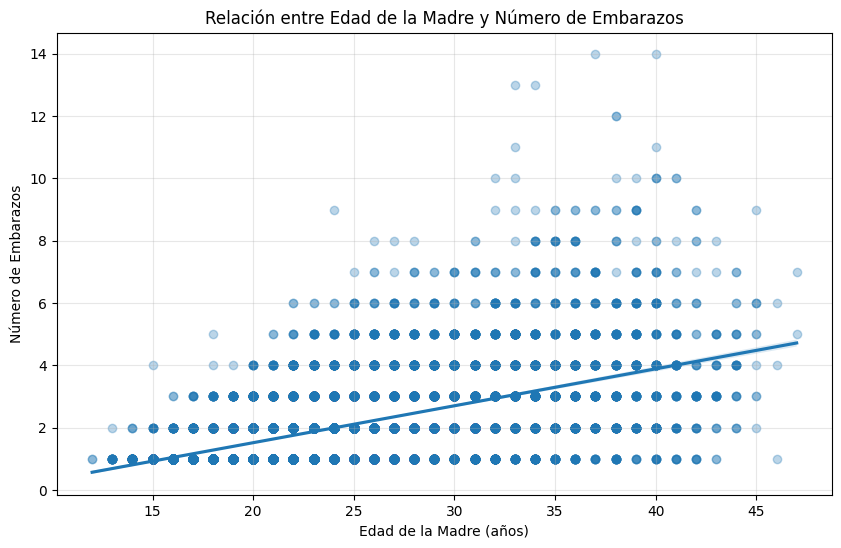

In [26]:
# Análisis de la relación Edad de la madre vs Número de embarazos
plt.figure(figsize=(10, 6))
sns.regplot(x='EDAD MADRE', y='NUMERO EMBARAZOS', data=df_relevantes, scatter_kws={'alpha':0.3})
plt.title('Relación entre Edad de la Madre y Número de Embarazos')
plt.xlabel('Edad de la Madre (años)')
plt.ylabel('Número de Embarazos')
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
# Casos extremos: madres menores de 18 con más de 2 embarazos
madres_jovenes_multiembarazos = df_relevantes[(df_relevantes['EDAD MADRE'] < 18) & 
                                             (df_relevantes['NUMERO EMBARAZOS'] > 2)]

In [28]:
print(f"\nMadres menores de 18 años con más de 2 embarazos: {len(madres_jovenes_multiembarazos)}")
if len(madres_jovenes_multiembarazos) > 0:
    print(madres_jovenes_multiembarazos[['EDAD MADRE', 'NUMERO EMBARAZOS']])


Madres menores de 18 años con más de 2 embarazos: 9
      EDAD MADRE  NUMERO EMBARAZOS
2741          17                 3
3355          17                 3
3670          15                 4
4164          16                 3
4531          17                 3
5352          17                 3
7564          17                 3
8325          17                 3
8783          16                 3


In [30]:
# Casos potencialmente incompatibles: más embarazos que edad fértil (desde los 12 años)
embarazos_excesivos = df_relevantes[df_relevantes['NUMERO EMBARAZOS'] > (df_relevantes['EDAD MADRE'] - 12)]

In [31]:
print(f"\nMadres con número de embarazos potencialmente incompatible con su edad: {len(embarazos_excesivos)}")
print("\nMuestras de estos casos:")
muestra = embarazos_excesivos[['EDAD MADRE', 'NUMERO EMBARAZOS']].sort_values('NUMERO EMBARAZOS', ascending=False).head(10)
print(muestra)


Madres con número de embarazos potencialmente incompatible con su edad: 4

Muestras de estos casos:
      EDAD MADRE  NUMERO EMBARAZOS
3670          15                 4
819           13                 2
3015          12                 1
8698          12                 1


5. LIMPIEZA DE NULOS

Durante la limpieza de datos se identificó un único registro con el valor “INDETERMINADO” en la variable SEXO. Debido a que:

- Solo representa un caso en todo el conjunto de datos,

- No es posible inferir o corregir su valor con certeza,

- Y su presencia puede afectar la codificación de variables categóricas,

se decidió reemplazarlo por un valor nulo (NaN).


In [33]:
#Como se tiene un solo registro con Sexo como indeterminado, se reemplaza por nan
df_relevantes['SEXO'] = df_relevantes['SEXO'].replace('INDETERMINADO', np.nan)

C:\Users\alexa\AppData\Local\Temp\ipykernel_13620\2992958880.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['SEXO'] = df_relevantes['SEXO'].replace('INDETERMINADO', np.nan)


In [34]:
#Verificamos que se haya reemplazado correctamente
df_relevantes['SEXO'].value_counts()

SEXO
MASCULINO    5077
FEMENINO     4959
Name: count, dtype: int64

In [35]:
# Conteo de nulos por columna
df_relevantes.isnull().sum()


SEXO                            1
PESO (Gramos)                   1
TALLA (CentImetros)             1
TIEMPO DE GESTACION             7
NUMERO CONSULTAS PRENATALES     0
TIPO PARTO                      0
MULTIPLICIDAD EMBARAZO          0
APGAR1                         22
APGAR2                         22
EDAD MADRE                      0
NUMERO HIJOS NACIDOS VIVOS      0
NUMERO EMBARAZOS                0
dtype: int64

In [36]:
# Visualizar registros con al menos un valor nulo
df_relevantes[df_relevantes.isnull().any(axis=1)]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
339,FEMENINO,2566.0,45.0,38.0,6,ESPONTANEO,SIMPLE,NaN,NaN,37,6,6
392,MASCULINO,2712.0,46.0,NaN,0,ESPONTANEO,SIMPLE,NaN,NaN,17,1,1
428,MASCULINO,2836.0,49.0,37.0,4,ESPONTANEO,SIMPLE,NaN,NaN,25,3,3
963,MASCULINO,2689.0,46.0,41.0,0,ESPONTANEO,SIMPLE,NaN,NaN,19,1,2
1139,MASCULINO,3025.0,49.0,39.0,5,ESPONTANEO,SIMPLE,NaN,NaN,34,5,5
1449,MASCULINO,2636.0,44.0,36.0,4,ESPONTANEO,SIMPLE,NaN,NaN,15,1,1
1673,MASCULINO,3150.0,47.0,NaN,0,ESPONTANEO,SIMPLE,NaN,NaN,39,7,7
2968,MASCULINO,3150.0,49.0,40.0,5,ESPONTANEO,SIMPLE,NaN,NaN,22,2,4
2976,MASCULINO,3127.0,50.0,37.0,5,ESPONTANEO,SIMPLE,NaN,NaN,21,2,2
3832,FEMENINO,3000.0,47.0,38.0,10,ESPONTANEO,SIMPLE,NaN,NaN,17,1,1


Se identificaron 22 registros con valores nulos simultáneamente en las variables APGAR1 y APGAR2.

Dado que APGAR2 es la variable objetivo del modelo predictivo, y no es posible realizar una predicción sin su valor real como referencia, se eliminaron los registros donde APGAR2 es nulo.

In [37]:
# Eliminación de registros con APGAR2 nulo (variable objetivo)
df_clean = df_relevantes.dropna(subset=['APGAR2'])
print(f"Registros después de eliminar filas con APGAR2 nulo: {len(df_clean)}")

Registros después de eliminar filas con APGAR2 nulo: 10015


In [38]:
# Verificar qué nulos quedan
df_clean[df_clean.isnull().any(axis=1)]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
4872,NaN,2616.0,42.0,36.0,7,ESPONTANEO,SIMPLE,8.0,8.0,18,1,1
5033,MASCULINO,2960.0,48.0,NaN,4,ESPONTANEO,SIMPLE,10.0,10.0,35,9,9
6011,FEMENINO,3545.0,50.0,NaN,0,ESPONTANEO,SIMPLE,10.0,10.0,27,5,5
6695,FEMENINO,2252.0,45.0,NaN,1,ESPONTANEO,SIMPLE,10.0,10.0,27,2,3
7120,MASCULINO,2876.0,47.0,NaN,2,ESPONTANEO,SIMPLE,10.0,10.0,41,10,10


Después del filtrado inicial, se identificaron algunos registros con valores faltantes:

- 1 registro con SEXO nulo, originado por la corrección de un valor "INDETERMINADO". Dado que se trata de una variable categórica con distribución relativamente equilibrada, se decidió imputar el valor faltante usando la moda de la columna.

- 4 registros con TIEMPO DE GESTACIÓN nulo.En lugar de eliminar estos registros, se optó por imputar los valores faltantes utilizando el método KNN Imputer, ya que:

  - El tiempo de gestación está fuertemente relacionado con otras variables numéricas como PESO y TALLA del recién nacido.

  - El método KNN permite estimar los valores faltantes con base en observaciones similares en esas variables correlacionadas, manteniendo la coherencia biológica.

In [39]:
# Imputar SEXO usando la moda
sexo_moda = df_clean['SEXO'].mode()[0]
df_clean['SEXO'] = df_clean['SEXO'].fillna(sexo_moda)

C:\Users\alexa\AppData\Local\Temp\ipykernel_13620\679479073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SEXO'] = df_clean['SEXO'].fillna(sexo_moda)


In [40]:
# Seleccionar solo las columnas numéricas relevantes para la imputación
cols_for_imputation = ['TIEMPO DE GESTACION', 'PESO (Gramos)', 'TALLA (CentImetros)']
# Crear un DataFrame temporal con solo estas columnas
temp_df = df_clean[cols_for_imputation].copy()


In [41]:
# Aplicar KNN imputer
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed = imputer.fit_transform(temp_df)
# Reemplazar los valores imputados solo donde había nulos
df_clean.loc[df_clean['TIEMPO DE GESTACION'].isnull(), 'TIEMPO DE GESTACION'] = (
    pd.DataFrame(temp_df_imputed, columns=cols_for_imputation, index=df_clean.index)
    .loc[df_clean['TIEMPO DE GESTACION'].isnull(), 'TIEMPO DE GESTACION']
)

In [42]:
# Ver registros que fueron imputados por KNN
df_clean.loc[[5033,6011,6695,7120]]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
5033,MASCULINO,2960.0,48.0,37.8,4,ESPONTANEO,SIMPLE,10.0,10.0,35,9,9
6011,FEMENINO,3545.0,50.0,39.4,0,ESPONTANEO,SIMPLE,10.0,10.0,27,5,5
6695,FEMENINO,2252.0,45.0,36.8,1,ESPONTANEO,SIMPLE,10.0,10.0,27,2,3
7120,MASCULINO,2876.0,47.0,39.2,2,ESPONTANEO,SIMPLE,10.0,10.0,41,10,10


6. CREACIÓN DE NUEVAS VARIABLES

In [43]:
# Codificación de variables categóricas con get_dummies
df_clean = pd.get_dummies(df_clean, columns=['TIPO PARTO', 'MULTIPLICIDAD EMBARAZO'], drop_first=False) 

In [44]:
df_clean = pd.get_dummies(df_clean, columns=['SEXO'], drop_first=True) 

Se creó una nueva variable llamada Índice de Masa Neonatal (IMN), calculada como el peso del recién nacido dividido por el cuadrado de su talla.

Esta métrica es análoga al Índice de Masa Corporal (IMC) utilizado en adultos, y permite evaluar de forma más estandarizada la constitución física del recién nacido, independientemente de su tamaño. 


In [45]:
df_clean['INDICE_MASA_NEONATAL'] = df_clean['PESO (Gramos)'] / (df_clean['TALLA (CentImetros)'] ** 2)
df_clean.head()

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO,INDICE_MASA_NEONATAL
0,2341.0,44.0,37.0,7,9.0,10.0,18,1,1,False,True,False,False,True,False,False,1.209194
1,3750.0,51.0,40.0,7,9.0,10.0,23,2,4,False,True,False,False,True,False,True,1.441753
2,3527.0,51.0,38.0,7,9.0,10.0,25,1,1,False,True,False,False,True,False,True,1.356017
3,2745.0,47.0,38.0,4,9.0,10.0,26,1,1,False,True,False,False,True,False,False,1.242644
4,2315.0,43.0,35.0,4,9.0,10.0,31,3,5,False,True,False,False,True,False,False,1.252028


7. ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

Se encontró que las variables PESO y TALLA están altamente correlacionadas (r = 0.87).

Además, ya se había creado una nueva variable ÍNDICE DE MASA NEONATAL (IMN) que combina ambas. Por lo tanto, se decidió eliminar las variables originales PESO y TALLA para evitar multicolinealidad y reducir la dimensionalidad del modelo sin perder información relevante.

In [46]:
matriz = df_clean.corr()
matriz

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO,INDICE_MASA_NEONATAL
PESO (Gramos),1.000000,0.870427,0.758943,0.169233,0.243934,0.263736,0.031346,0.008269,0.023489,-0.110011,0.063440,0.090882,-0.226559,0.229168,-0.033700,0.071299,0.851011
TALLA (CentImetros),0.870427,1.000000,0.763716,0.154061,0.254250,0.273111,0.007470,-0.010099,-0.001960,-0.169199,0.114094,0.104161,-0.202017,0.204594,-0.031489,0.090741,0.520799
TIEMPO DE GESTACION,0.758943,0.763716,1.000000,0.167266,0.311748,0.340221,-0.027351,-0.049755,-0.045691,-0.152865,0.104678,0.090659,-0.216723,0.220628,-0.040293,-0.007302,0.616758
NUMERO CONSULTAS PRENATALES,0.169233,0.154061,0.167266,1.000000,0.072866,0.079624,0.103791,-0.143354,-0.108759,0.007606,-0.024342,0.036735,-0.016268,0.017609,-0.009015,-0.014437,0.146947
APGAR1,0.243934,0.254250,0.311748,0.072866,1.000000,0.796537,-0.014622,0.001505,0.001216,-0.130569,0.154131,-0.062077,-0.082151,0.085331,-0.024990,-0.021385,0.224152
APGAR2,0.263736,0.273111,0.340221,0.079624,0.796537,1.000000,-0.016364,0.003531,0.005604,-0.148919,0.176948,-0.073293,-0.085571,0.088126,-0.021702,-0.011009,0.242872
EDAD MADRE,0.031346,0.007470,-0.027351,0.103791,-0.014622,-0.016364,1.000000,0.531700,0.547438,0.158841,-0.132765,-0.042479,0.034152,-0.040341,0.038211,-0.012805,0.034687
NUMERO HIJOS NACIDOS VIVOS,0.008269,-0.010099,-0.049755,-0.143354,0.001505,0.003531,0.531700,1.000000,0.878083,0.053793,0.004304,-0.120584,0.158829,-0.172677,0.092332,-0.005772,0.019968
NUMERO EMBARAZOS,0.023489,-0.001960,-0.045691,-0.108759,0.001216,0.005604,0.547438,0.878083,1.000000,0.055268,-0.002974,-0.107949,0.068947,-0.077571,0.055019,-0.012069,0.037013
TIPO PARTO_CESAREA,-0.110011,-0.169199,-0.152865,0.007606,-0.130569,-0.148919,0.158841,0.053793,0.055268,1.000000,-0.888739,-0.153393,0.192829,-0.198028,0.045709,0.002742,-0.040082


In [48]:
# Se eliminan las variables originales para evitar redundancia
df_clean.drop(columns=['PESO (Gramos)', 'TALLA (CentImetros)'], inplace=True)


In [50]:
matriz_nueva = df_clean.corr()
matriz_nueva

,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO,INDICE_MASA_NEONATAL
TIEMPO DE GESTACION,1.000000,0.167266,0.311748,0.340221,-0.027351,-0.049755,-0.045691,-0.152865,0.104678,0.090659,-0.216723,0.220628,-0.040293,-0.007302,0.616758
NUMERO CONSULTAS PRENATALES,0.167266,1.000000,0.072866,0.079624,0.103791,-0.143354,-0.108759,0.007606,-0.024342,0.036735,-0.016268,0.017609,-0.009015,-0.014437,0.146947
APGAR1,0.311748,0.072866,1.000000,0.796537,-0.014622,0.001505,0.001216,-0.130569,0.154131,-0.062077,-0.082151,0.085331,-0.024990,-0.021385,0.224152
APGAR2,0.340221,0.079624,0.796537,1.000000,-0.016364,0.003531,0.005604,-0.148919,0.176948,-0.073293,-0.085571,0.088126,-0.021702,-0.011009,0.242872
EDAD MADRE,-0.027351,0.103791,-0.014622,-0.016364,1.000000,0.531700,0.547438,0.158841,-0.132765,-0.042479,0.034152,-0.040341,0.038211,-0.012805,0.034687
NUMERO HIJOS NACIDOS VIVOS,-0.049755,-0.143354,0.001505,0.003531,0.531700,1.000000,0.878083,0.053793,0.004304,-0.120584,0.158829,-0.172677,0.092332,-0.005772,0.019968
NUMERO EMBARAZOS,-0.045691,-0.108759,0.001216,0.005604,0.547438,0.878083,1.000000,0.055268,-0.002974,-0.107949,0.068947,-0.077571,0.055019,-0.012069,0.037013
TIPO PARTO_CESAREA,-0.152865,0.007606,-0.130569,-0.148919,0.158841,0.053793,0.055268,1.000000,-0.888739,-0.153393,0.192829,-0.198028,0.045709,0.002742,-0.040082
TIPO PARTO_ESPONTANEO,0.104678,-0.024342,0.154131,0.176948,-0.132765,0.004304,-0.002974,-0.888739,1.000000,-0.316662,-0.168712,0.173370,-0.040623,-0.021283,0.016190
TIPO PARTO_INSTRUMENTADO,0.090659,0.036735,-0.062077,-0.073293,-0.042479,-0.120584,-0.107949,-0.153393,-0.316662,1.000000,-0.035320,0.036034,-0.007011,0.040204,0.048036


8. ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIONES)

Se evaluó la correlación entre las variables predictoras y la variable objetivo APGAR2 con el fin de identificar variables irrelevantes.

Para este análisis, se utilizó un umbral de correlación menor a 0.05 (r < 0.05) para considerar una variable como irrelevante. Este umbral se eligió en lugar de un valor más alto como 0.1 por las siguientes razones:

- En contextos clínicos, incluso relaciones débiles pueden ser relevantes; sin embargo, un umbral de 0.1 podría eliminar variables con algún aporte indirecto o no lineal.

- Un umbral más estricto (0.05) permite conservar únicamente variables con al menos una ligera relación lineal con la variable objetivo, reduciendo el riesgo de incluir ruido en el modelo.

Con base en este criterio, se eliminaron las siguientes variables por su muy baja correlación con APGAR2:

* edad madre

* número de hijos nacidos vivos

* número de embarazos

* tipo de parto instrumentado

* multiplicidad del embarazo (doble, simple, triple)

* sexo masculino

Esta limpieza busca mejorar la eficiencia del modelo sin perder variables con valor clínico o predictivo significativo.

In [51]:
df_clean_2 = df_clean.drop(columns=['EDAD MADRE', 'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS', 'TIPO PARTO_INSTRUMENTADO', 'MULTIPLICIDAD EMBARAZO_DOBLE',
                                    'MULTIPLICIDAD EMBARAZO_SIMPLE', 'MULTIPLICIDAD EMBARAZO_TRIPLE','SEXO_MASCULINO'])

In [52]:
df_clean_2.head()

,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,INDICE_MASA_NEONATAL
0,37.0,7,9.0,10.0,False,True,1.209194
1,40.0,7,9.0,10.0,False,True,1.441753
2,38.0,7,9.0,10.0,False,True,1.356017
3,38.0,4,9.0,10.0,False,True,1.242644
4,35.0,4,9.0,10.0,False,True,1.252028


In [53]:
# Guardar dataset preprocesado final
df_clean.to_csv("df_preparado_para_modelado.csv", index=False)
df_clean_2.to_csv("df_limpio.csv", index=False)